*Importing the Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
!pip install stats statsmodels
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24284 sha256=b6c4797856558055ba5c79e74ce5ba653ac2c5e26db53ab48cc80be293cc010b
  Stored in directory: /root/.cache/pip/wheels/c9/85/bc/3371b9bce1e4f7b8b638e8c968a4dbd74db171ee180c48f808
Successfully built stats


*Data Collection and Data Processing*

In [2]:
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
# Getting some basic information about the data (missing values, data types, shape)
gold_data.info()
# checking for only missing values
# gold_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**

**Positive Correlation:** When two variables increase or decrease together, showing a direct relationship.

**Negative Correlation:** When one variable increases while the other decreases, showing an inverse relationship.

In [7]:
# gold_data.corr() finds the relationship (positive/negative) between the numbers in the columns of the gold_data table.
# correlation = gold_data.corr()
# could not convert string to float: '1/2/2008'
# Just drop the date column and then run correlation. correlation = df.drop(['Date'],axis=1).corr() or
correlation = gold_data.corr(numeric_only=True)
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

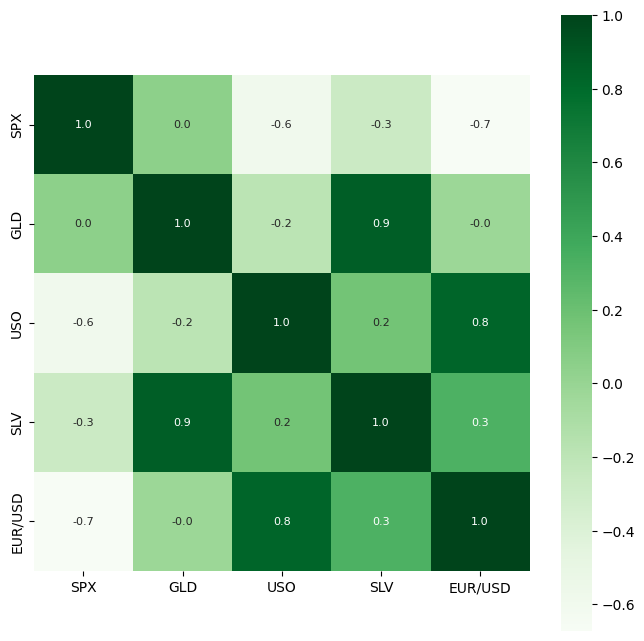

In [8]:
# Now creates an 8x8 heatmap using sns.heatmap to visualize the correlation matrix:
# cbar=True: Displays a color bar for reference.
# square=True: Makes the cells square-shaped.
# fmt='.1f': Displays correlation values rounded to one decimal place.
# annot=True: Adds correlation values inside each cell.
# annot_kws={'size':8}: Sets the annotation text size to 8.
# cmap='Blues': Uses shades of blue for the color map. (Spectral,PuBuGn,cividis,Greens,Oranges,Accent,CMRmap,Dark2,twilight,RdBu,magma)

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

<Axes: xlabel='GLD', ylabel='Density'>

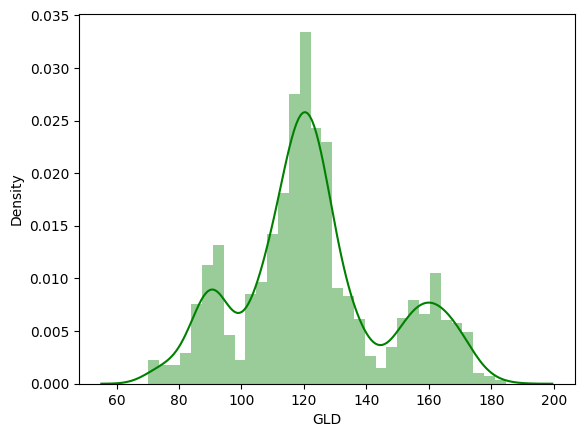

In [9]:
# This plots the distribution of the GLD column in green, showing its spread and density.
# sns.distplot(): Plots the histogram and density curve
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [10]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [11]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [12]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [13]:
# This splits the data into training and testing sets, using 80% for training and 20% for testing, with a fixed random seed for reproducibility.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [14]:
# This creates a Random Forest regressor model with 100 decision trees to make predictions.
# improve accuracy by averaging their predictions
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
# training the model
#  trains the regressor (Random Forest model) on the training data (X_train for input features and Y_train for target values),
# allowing it to learn patterns in the data, .fit() used or training data and learns from it. After that model is ready to make predictions based on the patterns.
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [16]:
# prediction on Test Data
# trained regressor model to predict target values for the test data (X_test)
test_data_prediction = regressor.predict(X_test)

In [17]:
print(test_data_prediction)

[168.66829943  82.15709963 116.14230037 127.55660083 120.7700015
 154.70459823 150.17839819 126.04710015 117.42879868 125.97090115
 116.88360083 172.77390106 141.7546988  167.77599849 115.22819986
 117.83520058 140.10790347 169.87120093 159.0397037  160.2822999
 154.90130042 124.82560022 176.17900002 156.67790362 125.30780017
  94.0405      78.20920001 120.68040007 119.15529967 167.52749989
  88.13920072 125.27330012  91.17120068 117.78810006 121.08779925
 136.07600122 115.55230118 114.95940084 147.18719983 107.32110108
 104.48980251  87.13809795 126.38020052 117.88090014 152.8089989
 119.57070019 108.31709961 107.99109803  93.23210014 126.92609829
  74.74110052 113.56779921 121.4003     111.03949938 118.917999
 120.87929956 159.18080028 167.70810135 147.0357971   86.05539879
  94.42470031  86.96419915  90.67010016 119.03320047 126.40060075
 127.50190048 170.70529991 122.25629977 117.27169902  98.79850072
 168.55670094 143.33969824 132.18550253 120.94050224 120.82659933
 119.70030071 1

In [18]:
# This calculates the R squared score to check how well the model's predictions match the actual test values
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895249095138847


Compare the Actual Values and Predicted Values in a Plot

In [19]:
Y_test = list(Y_test)

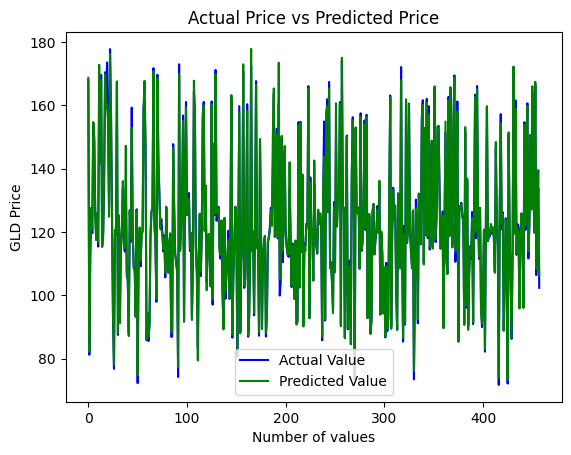

In [20]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## **ARIMA/SARIMA MODEL for future prediction**

In [21]:
gold_data['Date']=pd.to_datetime(gold_data['Date'])
gold_data=gold_data.drop(['SPX','USO','SLV','EUR/USD'],axis=1)
gold_data.set_index('Date', inplace=True)
gold_data_month_wise=gold_data['GLD'].resample('MS').sum()
gold_data_month_wise.head()
# A YEAR END
# M MONTH END
# W WEEKLY
#  D DAILY
# MS MONTH START

,GLD
Date,
2008-01-01,1851.439997
2008-02-01,1829.749991
2008-03-01,1809.239996
2008-04-01,1530.189989
2008-05-01,1402.769989


<Axes: xlabel='Date'>

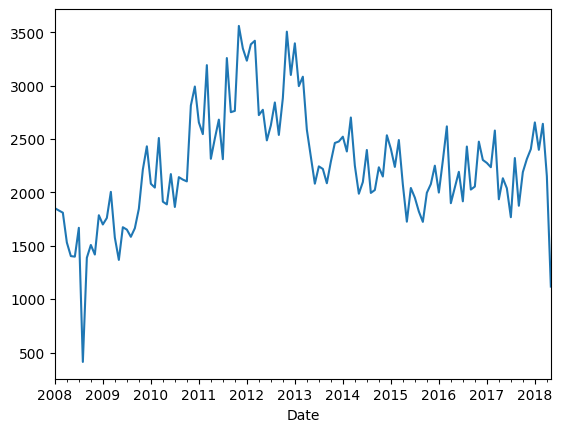

In [22]:
gold_data_month_wise.plot()

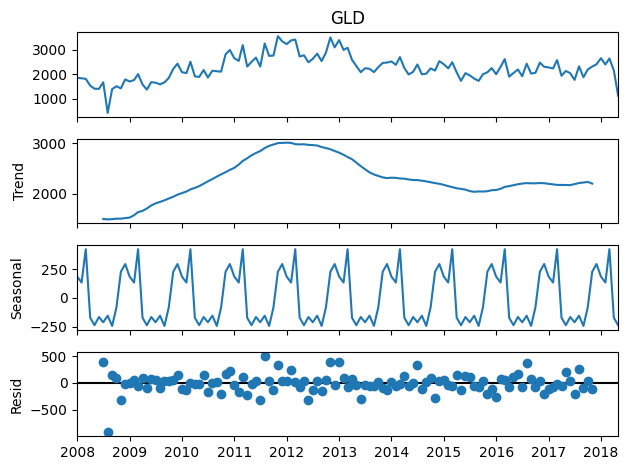

In [23]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(gold_data_month_wise, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
adtest=adfuller(gold_data_month_wise)
print(adtest)
p=adtest[1]
print(p)
# p is greater than 0.05 then not staticmethod

(-2.202606984977125, 0.20530063270886117, 13, 111, {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}, 1530.2885887268592)
0.20530063270886117


In [25]:
# # Check for stationarity using Augmented Dickey-Fuller (ADF) test
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(gold_data_month_wise)
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# print('Critical Values:', result[4])

# # If not stationary, apply differencing
# if result[1] > 0.05:
#     data_diff = gold_data_month_wise.diff(1).dropna()

In [26]:
gold_data_month_wise.head(20)

,GLD
Date,
2008-01-01,1851.439997
2008-02-01,1829.749991
2008-03-01,1809.239996
2008-04-01,1530.189989
2008-05-01,1402.769989
2008-06-01,1397.649986
2008-07-01,1667.670007
2008-08-01,411.790000
2008-09-01,1387.039994


In [27]:
data_seasonal_first_diff = gold_data_month_wise - gold_data_month_wise.shift(6)
data_seasonal_first_diff_first_diff = data_seasonal_first_diff.diff()
data_seasonal_first_diff_first_diff.head(20)

,GLD
Date,
2008-01-01,NaN
2008-02-01,NaN
2008-03-01,NaN
2008-04-01,NaN
2008-05-01,NaN
2008-06-01,NaN
2008-07-01,NaN
2008-08-01,-1234.190001
2008-09-01,995.759989


In [28]:
len(gold_data_month_wise)

125

In [29]:
train=gold_data_month_wise[0:100]
test=gold_data_month_wise[100:]

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

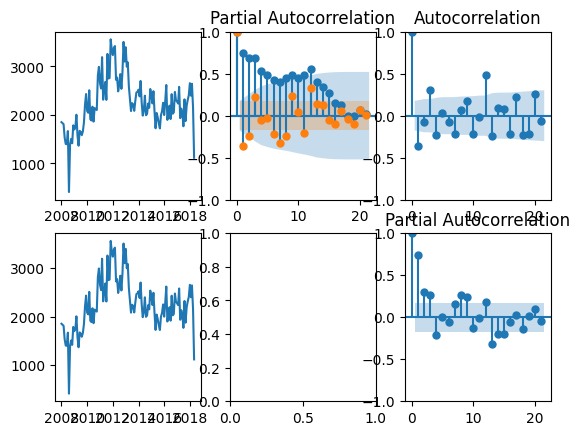

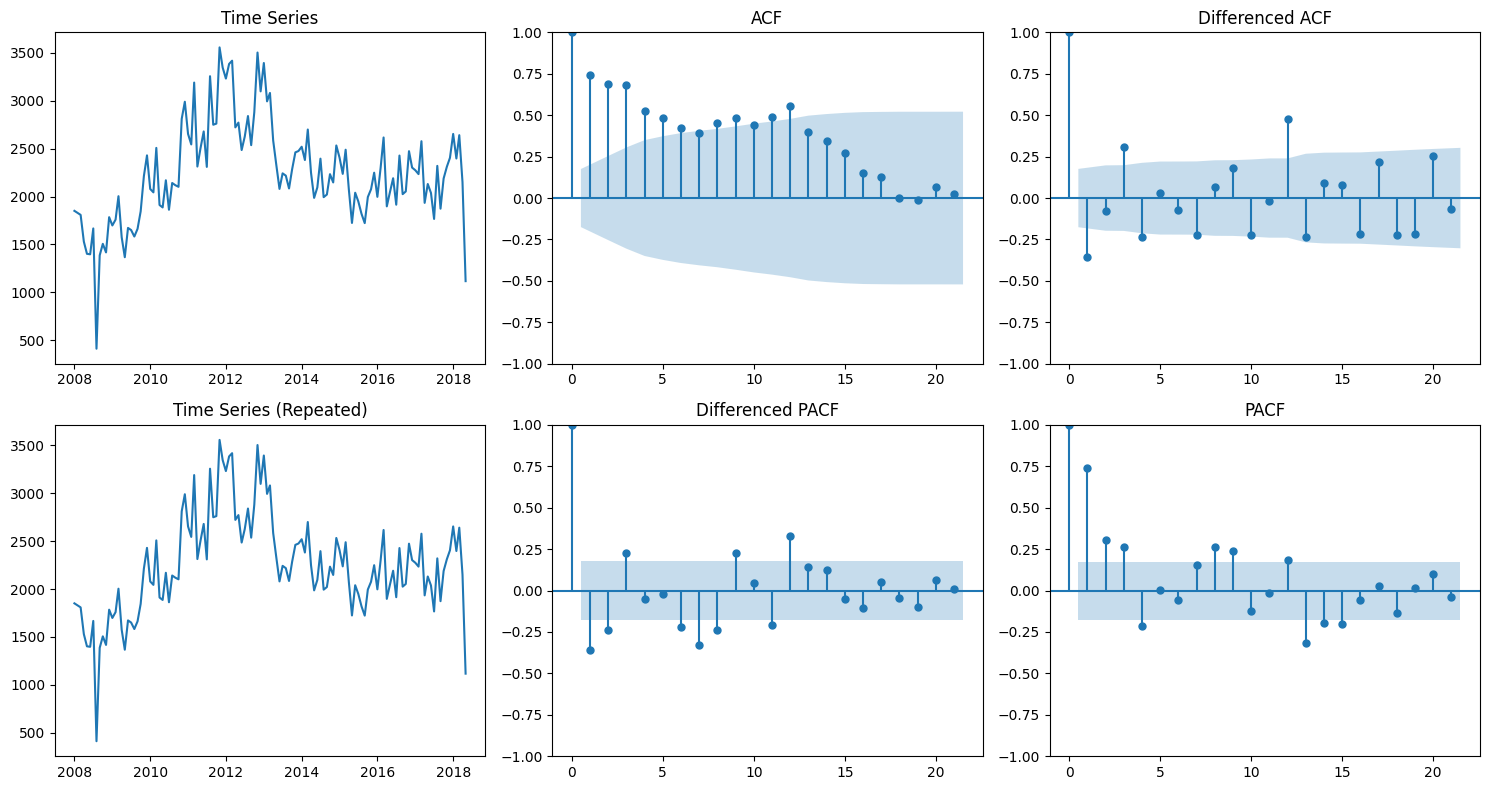

In [31]:
fig,axes=plt.subplots(2,3)
axes[0,0].plot(gold_data_month_wise)
plot_acf(gold_data_month_wise,ax=axes[0,1])
plot_acf(gold_data_month_wise.diff().dropna(),ax=axes[0,2]) # Added parentheses after dropna
axes[1,0].plot(gold_data_month_wise)
plot_pacf(gold_data_month_wise.diff().dropna(),ax=axes[0,1]) # Added parentheses after dropna
plot_pacf(gold_data_month_wise.dropna(),ax=axes[1,2]) # Added parentheses after dropna
# plt.show()
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Adjusted figsize to make plots larger and clearer


# Plot original time series
axes[0, 0].plot(gold_data_month_wise)
axes[0, 0].set_title("Time Series")

# Plot ACF of original time series
plot_acf(gold_data_month_wise, ax=axes[0, 1])
axes[0, 1].set_title("ACF")

# Plot ACF of differenced time series
plot_acf(gold_data_month_wise.diff().dropna(), ax=axes[0, 2])
axes[0, 2].set_title("Differenced ACF")

# Plot second row: original time series
axes[1, 0].plot(gold_data_month_wise)
axes[1, 0].set_title("Time Series (Repeated)")

# Plot PACF of differenced time series
plot_pacf(gold_data_month_wise.diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title("Differenced PACF")

# Plot PACF of original time series
plot_pacf(gold_data_month_wise.dropna(), ax=axes[1, 2])
axes[1, 2].set_title("PACF")

# Adjust layout
fig.tight_layout()
plt.show()

In [32]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00


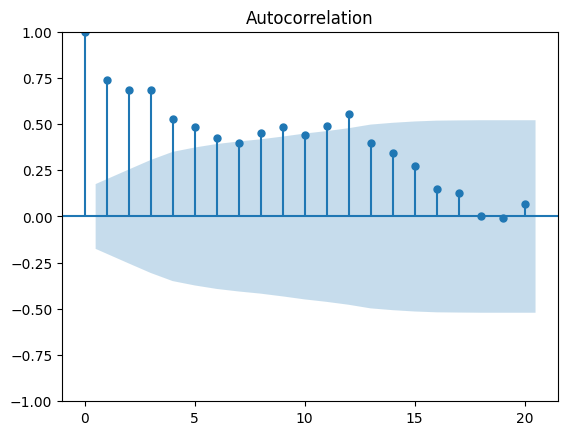

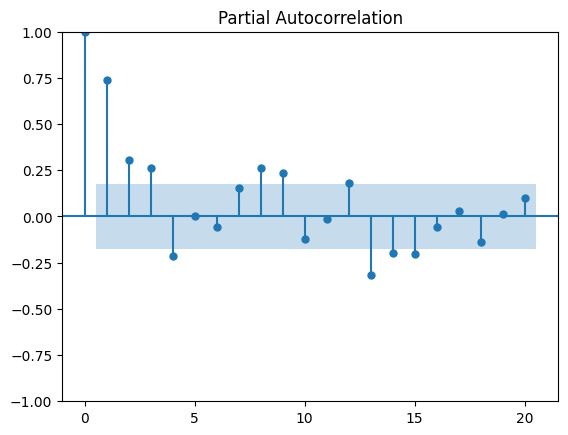

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF plot
plot_acf(gold_data_month_wise, lags=20)
plt.show()

# PACF plot
plot_pacf(gold_data_month_wise, lags=20, method='ywm')
plt.show()


In [34]:
import pmdarima
from pmdarima import auto_arima

In [35]:
auto_arima(train, m=12, start_p=2, seasonal=True, d=1, error_action='ignore', suppress_warnings=True, stepwise=True)

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [36]:
# (3,1,0)(1,0,0)[12]

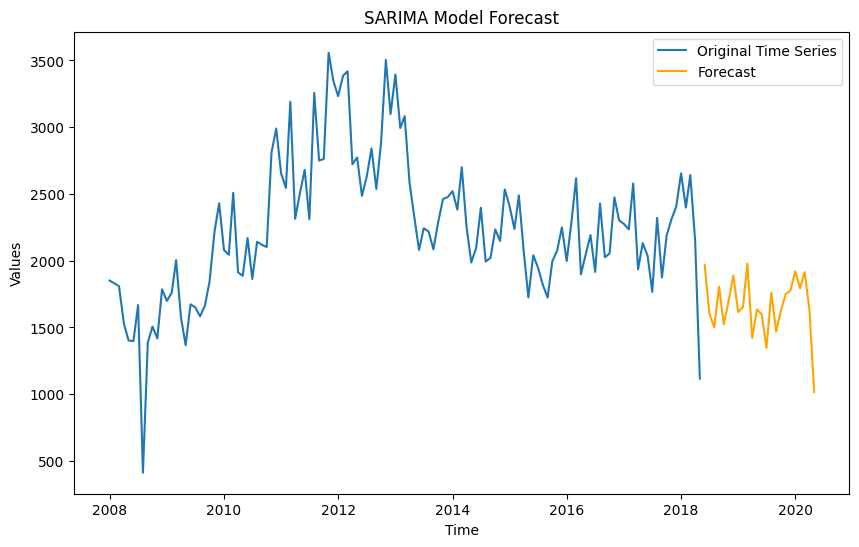

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming your time series data is in a pandas Series named `ts`

# Define SARIMA order
p, d, q = 3, 1, 0    # Non-seasonal ARIMA parameters
P, D, Q, s = 1, 0, 0, 24  # Seasonal parameters (s = 12 for yearly seasonality)

# Step 1: Fit the SARIMA model
model = SARIMAX(gold_data_month_wise, order=(p, d, q), seasonal_order=(P, D, Q, s))
fitted_model = model.fit()

# Step 2: Forecast future values
forecast_steps = 24
future_dates = pd.date_range(start=gold_data_month_wise.index[-1], periods=forecast_steps + 1, freq='MS')[1:] # freq='MS' for monthly start
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast = forecast.predicted_mean
forecast.index = future_dates


# Step 3: Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(gold_data_month_wise, label='Original Time Series')
plt.plot(forecast, label='Forecast', color='orange')  # Use the forecast index
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("SARIMA Model Forecast")
plt.legend()
plt.show()

#**Model with Box-Cox Transform**


In [38]:
gold_data_month_wise_df = gold_data_month_wise.to_frame()
gold_data_month_wise_df.columns

Index(['GLD'], dtype='object')

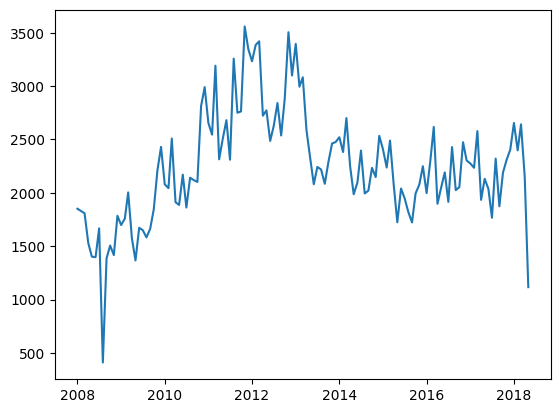

In [39]:
plt.plot(gold_data_month_wise_df)

NaN in test['GLD']: False
NaN in forecast_inverted: False
Mean Squared Error: 91978.97575468887


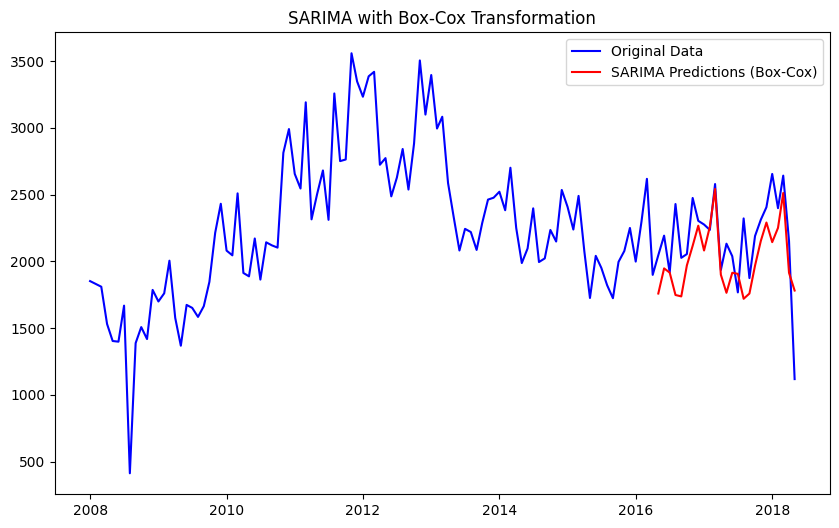

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
values = gold_data_month_wise_df['GLD']

# Apply Box-Cox Transformation
transformed_values, lambda_boxcox = boxcox(values)

# Add transformed values back to DataFrame for modeling
gold_data_month_wise_df['transformed'] = transformed_values

# Split the data into train and test sets
train_size = int(len(gold_data_month_wise_df) * 0.8)
train, test = gold_data_month_wise_df.iloc[:train_size], gold_data_month_wise_df.iloc[train_size:]

# SARIMA model fitting
sarima_model = SARIMAX(train['transformed'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_fit.forecast(steps=len(test))

# Inverse Box-Cox Transformation of predictions
forecast_inverted = np.exp(np.log(lambda_boxcox * forecast + 1) / lambda_boxcox)
print("NaN in test['GLD']:", test['GLD'].isnull().any())
print("NaN in forecast_inverted:", forecast_inverted.isnull().any())
forecast_inverted.fillna(method="ffill", inplace=True)

# Evaluate predictions
mse = mean_squared_error(test['GLD'], forecast_inverted)
print(f"Mean Squared Error: {mse}")

# Visualize results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(test.index, forecast_inverted, label="SARIMA Predictions (Box-Cox)", color="red")
plt.legend()
plt.title("SARIMA with Box-Cox Transformation")
plt.show()

ADF Statistic: -2.202606984977125
p-value: 0.20530063270886117
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 1803.746533639434
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 1702.1175143789262
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 1292.558600647077
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 1276.071261713165
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC: 1127.3185089348306
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC: 1126.5233774768728
SARIMA(0, 0, 0)x(0, 3, 0, 12) - AIC: 981.0769517695461
SARIMA(0, 0, 0)x(0, 3, 1, 12) - AIC: 977.5473130196992
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 1504.4156946270512
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 1487.3975093221522
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 1275.9207254892654
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 1276.5662271044384
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC: 1127.811365817345
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC: 1124.1978747310982
SARIMA(0, 0, 0)x(1, 3, 0, 12) - AIC: 981.2005945982173
SARIMA(0, 0, 0)x(1, 3, 1, 12) - AIC: 983.3667421814762
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC: 1486.6166865

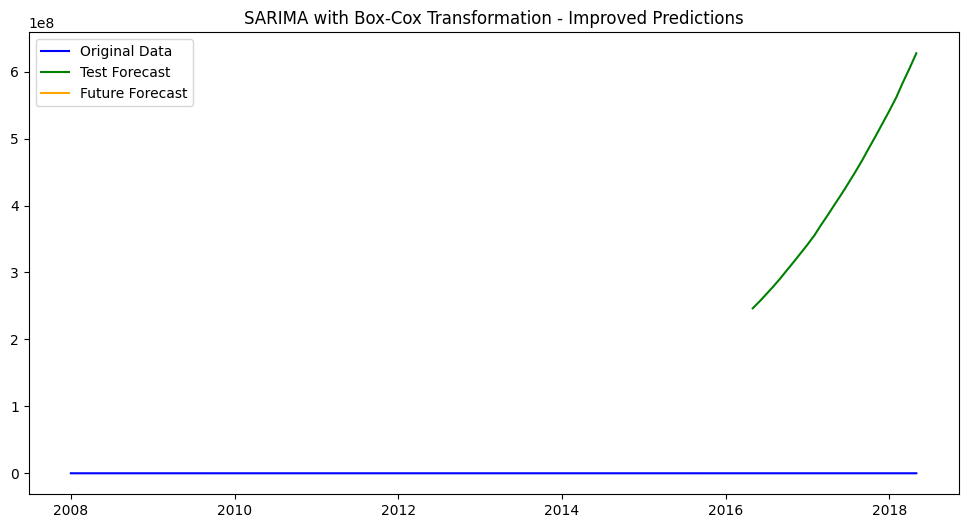

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Ensure data is stationary
result = adfuller(gold_data_month_wise_df['GLD'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Apply Box-Cox Transformation
values = gold_data_month_wise_df['GLD']
transformed_values, lambda_boxcox = boxcox(values)
gold_data_month_wise_df['transformed'] = transformed_values

# Split the data into train and test sets
train_size = int(len(gold_data_month_wise_df) * 0.8)
train, test = gold_data_month_wise_df.iloc[:train_size], gold_data_month_wise_df.iloc[train_size:]

# Parameter Tuning for SARIMA
from itertools import product
import statsmodels.api as sm

# Define parameter ranges

p=range(0,4)
d=range(0,4)
q=range(0,2)
P = range(0, 4)
D = range(0, 4)
Q = range(0, 2)
seasonal_period = [12]

# Grid search for best parameters
pdq = list(product(p, d, q))
seasonal_pdq = list(product(P, D, Q, seasonal_period))

best_aic = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train['transformed'], order=order, seasonal_order=seasonal_order)
            results = model.fit(disp=False)
            print(f"SARIMA{order}x{seasonal_order} - AIC: {results.aic}")
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best SARIMA order: {best_order}, Seasonal order: {best_seasonal_order}")


# Fit SARIMA model with best parameters
sarima_model = SARIMAX(train['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_fit.forecast(steps=len(test))

# Inverse Box-Cox Transformation
forecast_inverted = np.exp(np.log(lambda_boxcox * forecast + 1) / lambda_boxcox)

# Handle NaN values in predictions
forecast_inverted = pd.Series(forecast_inverted).fillna(method="ffill").fillna(method="bfill")

# Evaluate predictions
mse = mean_squared_error(test['GLD'], forecast_inverted)
print(f"Mean Squared Error: {mse}")

# Fit SARIMA on the full dataset for future predictions
sarima_model_full = SARIMAX(gold_data_month_wise_df['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit_full = sarima_model_full.fit(disp=False)

# Predict future values (next 72 months)
future_steps = 48
future_forecast = sarima_fit_full.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
last_date = gold_data_month_wise_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(test.index, forecast_inverted, label="Test Forecast", color="green")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Improved Predictions")
plt.legend()
plt.show()


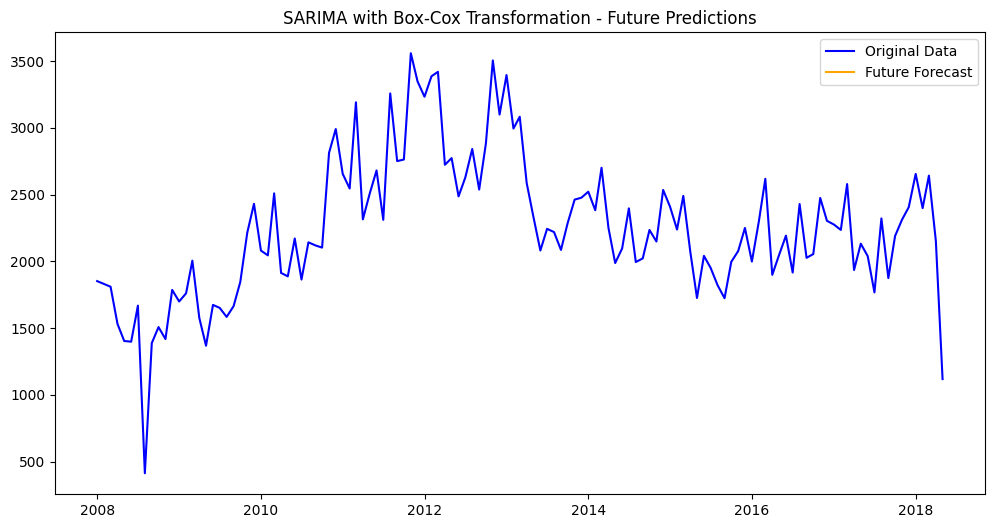

In [42]:

sarima_model = SARIMAX(gold_data_month_wise_df['transformed'], order=(0, 3, 1), seasonal_order=(2, 3, 0,12))
sarima_fit = sarima_model.fit(disp=False)

# Predict future values (e.g., next 12 months)
future_steps = 24
future_forecast = sarima_fit.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
last_date = gold_data_month_wise_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Future Predictions")
plt.legend()
plt.show()


NaN in test['GLD']: False
NaN in forecast_inverted: False
Mean Squared Error: 96102.37420537737


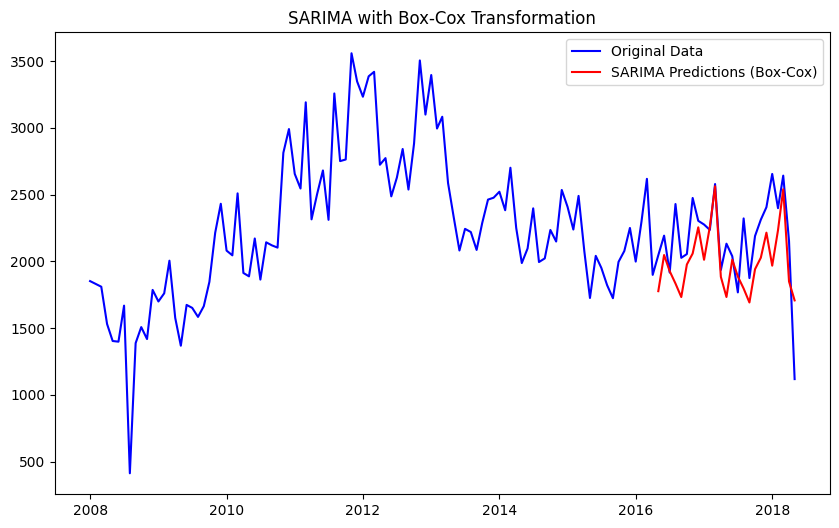

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
values = gold_data_month_wise_df['GLD']

# Apply Box-Cox Transformation
transformed_values, lambda_boxcox = boxcox(values)

# Add transformed values back to DataFrame for modeling
gold_data_month_wise_df['transformed'] = transformed_values

# Split the data into train and test sets
train_size = int(len(gold_data_month_wise_df) * 0.8)
train, test = gold_data_month_wise_df.iloc[:train_size], gold_data_month_wise_df.iloc[train_size:]

# SARIMA model fitting
sarima_model = SARIMAX(train['transformed'], order=(2,1,0), seasonal_order=(2,1,0,12))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_fit.forecast(steps=len(test))

# Inverse Box-Cox Transformation of predictions
forecast_inverted = np.exp(np.log(lambda_boxcox * forecast + 1) / lambda_boxcox)
print("NaN in test['GLD']:", test['GLD'].isnull().any())
print("NaN in forecast_inverted:", forecast_inverted.isnull().any())
forecast_inverted = forecast_inverted.fillna(test['GLD'].mean())

# Evaluate predictions
mse = mean_squared_error(test['GLD'], forecast_inverted)
print(f"Mean Squared Error: {mse}")

# Visualize results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(test.index, forecast_inverted, label="SARIMA Predictions (Box-Cox)", color="red")
plt.legend()
plt.title("SARIMA with Box-Cox Transformation")
plt.show()

In [44]:
# SARIMA(3, 3, 1)x(1, 2, 1, 12) - AIC: 1030.7714027427207 not correct
# SARIMA(2, 1, 0)x(0, 3, 1, 12) - AIC: 8.0 lowest good:)
# SARIMA(1, 3, 1)x(2, 2, 1, 12) - AIC: 1098.694309786693 not shown
# SARIMA(2, 2, 1)x(2, 3, 0, 12) - AIC: 12.0 not correct
# SARIMA(0, 3, 1)x(2, 3, 0, 12) - AIC: 8.0

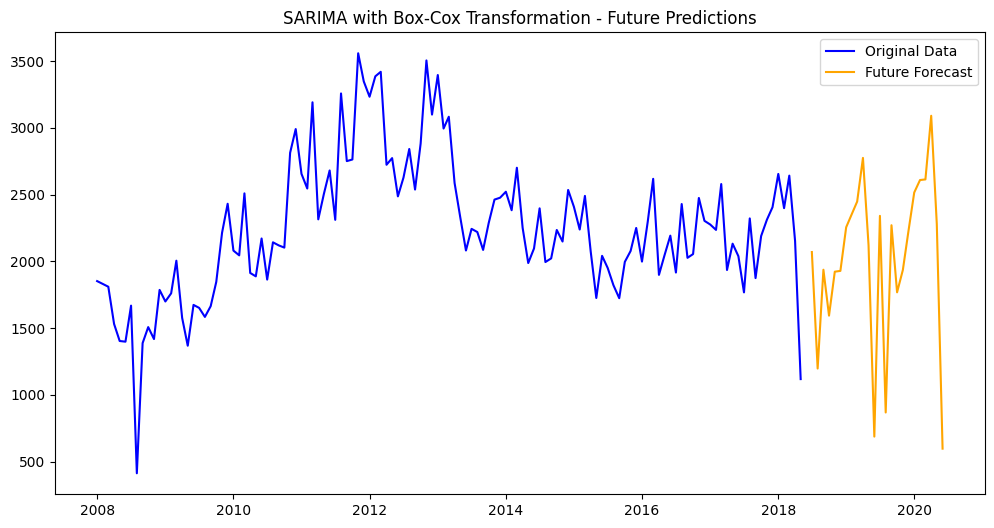

In [45]:
sarima_model = SARIMAX(gold_data_month_wise_df['transformed'], order=(2,1,0), seasonal_order=(0,3,1,12))
sarima_fit = sarima_model.fit(disp=False)

# Predict future values (e.g., next 12 months)
future_steps = 24
future_forecast = sarima_fit.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
last_date = gold_data_month_wise_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Future Predictions")
plt.legend()
plt.show()

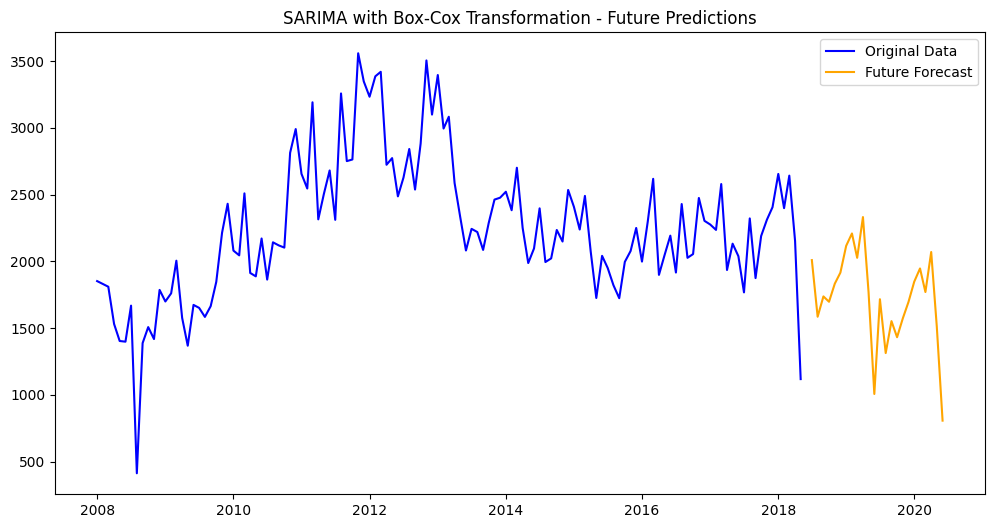

In [46]:
# determiine p,d,q from acf and pacf plot

sarima_model = SARIMAX(gold_data_month_wise_df['transformed'], order=(2,1,0), seasonal_order=(2,1,0,12))
sarima_fit = sarima_model.fit(disp=False)

# Predict future values (e.g., next 12 months)
future_steps = 24
future_forecast = sarima_fit.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
last_date = gold_data_month_wise_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Future Predictions")
plt.legend()
plt.show()

# Save future predictions to a CSV file
future_df.to_csv("future_predictions-gold-price-1.csv")

In [47]:
gold_data_month_wise_df

,GLD,transformed
Date,,
2008-01-01,1851.439997,1579.438341
2008-02-01,1829.749991,1561.370283
2008-03-01,1809.239996,1544.280402
2008-04-01,1530.189989,1311.270280
2008-05-01,1402.769989,1204.539173
...,...,...
2018-01-01,2654.420014,2245.141648
2018-02-01,2398.030006,2033.200403
2018-03-01,2641.560005,2234.523368


ADF Statistic: -2.202606984977125
p-value: 0.20530063270886117
SARIMA(0, 0, 0)x(0, 0, 0, 12) - BIC: 1806.351703825422
SARIMA(0, 0, 0)x(0, 0, 1, 12) - BIC: 1707.3278547509024
SARIMA(0, 0, 0)x(0, 1, 0, 12) - BIC: 1295.035937461555
SARIMA(0, 0, 0)x(0, 1, 1, 12) - BIC: 1281.0259353421216
SARIMA(0, 0, 0)x(0, 2, 0, 12) - BIC: 1129.6492422751169
SARIMA(0, 0, 0)x(0, 2, 1, 12) - BIC: 1131.1848441574455
SARIMA(0, 0, 0)x(0, 3, 0, 12) - BIC: 983.2358348529058
SARIMA(0, 0, 0)x(0, 3, 1, 12) - BIC: 981.8650791864186
SARIMA(0, 0, 0)x(1, 0, 0, 12) - BIC: 1509.6260349990273
SARIMA(0, 0, 0)x(1, 0, 1, 12) - BIC: 1495.2130198801165
SARIMA(0, 0, 0)x(1, 1, 0, 12) - BIC: 1280.8753991182218
SARIMA(0, 0, 0)x(1, 1, 1, 12) - BIC: 1283.998237547873
SARIMA(0, 0, 0)x(1, 2, 0, 12) - BIC: 1132.4728324979176
SARIMA(0, 0, 0)x(1, 2, 1, 12) - BIC: 1131.1900747519571
SARIMA(0, 0, 0)x(1, 3, 0, 12) - BIC: 985.5183607649367
SARIMA(0, 0, 0)x(1, 3, 1, 12) - BIC: 989.8433914315552
SARIMA(0, 0, 0)x(2, 0, 0, 12) - BIC: 1494.432197

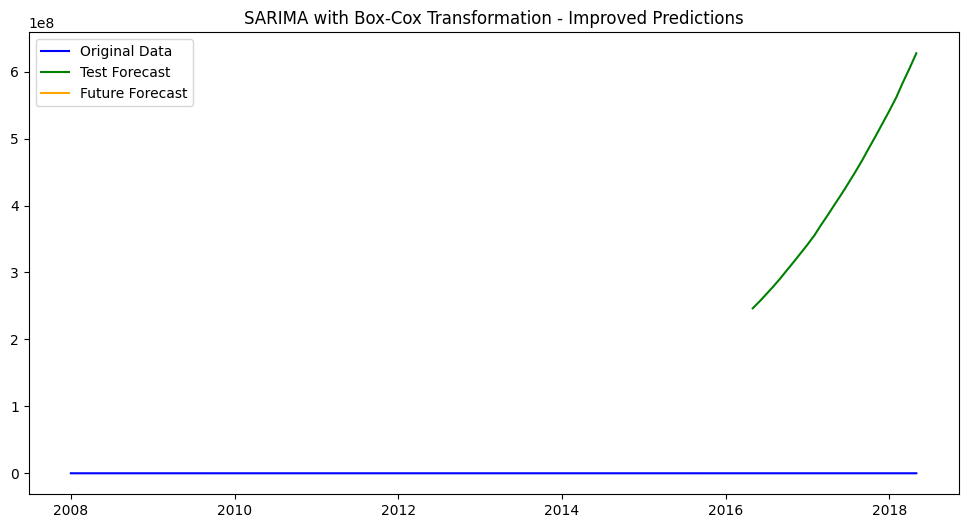

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Ensure data is stationary
result = adfuller(gold_data_month_wise_df['GLD'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Apply Box-Cox Transformation
values = gold_data_month_wise_df['GLD']
transformed_values, lambda_boxcox = boxcox(values)
gold_data_month_wise_df['transformed'] = transformed_values

# Split the data into train and test sets
train_size = int(len(gold_data_month_wise_df) * 0.8)
train, test = gold_data_month_wise_df.iloc[:train_size], gold_data_month_wise_df.iloc[train_size:]

# Parameter Tuning for SARIMA
from itertools import product
import statsmodels.api as sm

# Define parameter ranges

p=range(0,4)
d=range(0,4)
q=range(0,2)
P = range(0, 4)
D = range(0, 4)
Q = range(0, 2)
seasonal_period = [12]

# Grid search for best parameters
pdq = list(product(p, d, q))
seasonal_pdq = list(product(P, D, Q, seasonal_period))

best_bic = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train['transformed'], order=order, seasonal_order=seasonal_order)
            results = model.fit(disp=False)
            print(f"SARIMA{order}x{seasonal_order} - BIC: {results.bic}")
            if results.bic < best_bic:
                best_bic = results.bic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best SARIMA order: {best_order}, Seasonal order: {best_seasonal_order}")


# Fit SARIMA model with best parameters
sarima_model = SARIMAX(train['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_fit.forecast(steps=len(test))

# Inverse Box-Cox Transformation
forecast_inverted = np.exp(np.log(lambda_boxcox * forecast + 1) / lambda_boxcox)

# Handle NaN values in predictions
forecast_inverted = pd.Series(forecast_inverted).fillna(method="ffill").fillna(method="bfill")

# Evaluate predictions
mse = mean_squared_error(test['GLD'], forecast_inverted)
print(f"Mean Squared Error: {mse}")

# Fit SARIMA on the full dataset for future predictions
sarima_model_full = SARIMAX(gold_data_month_wise_df['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit_full = sarima_model_full.fit(disp=False)

# Predict future values (next 72 months)
future_steps = 48
future_forecast = sarima_fit_full.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
last_date = gold_data_month_wise_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(test.index, forecast_inverted, label="Test Forecast", color="green")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Improved Predictions")
plt.legend()
plt.show()


In [49]:
# SARIMA(2, 1, 0)x(0, 3, 1, 12) - BIC: 16.57253890556613
# SARIMA(0, 3, 1)x(2, 3, 0, 12) - BIC: 16.443495456693245
# SARIMA(2, 1, 0)x(0, 3, 1, 12) - AIC: 8.0 lowest good:)

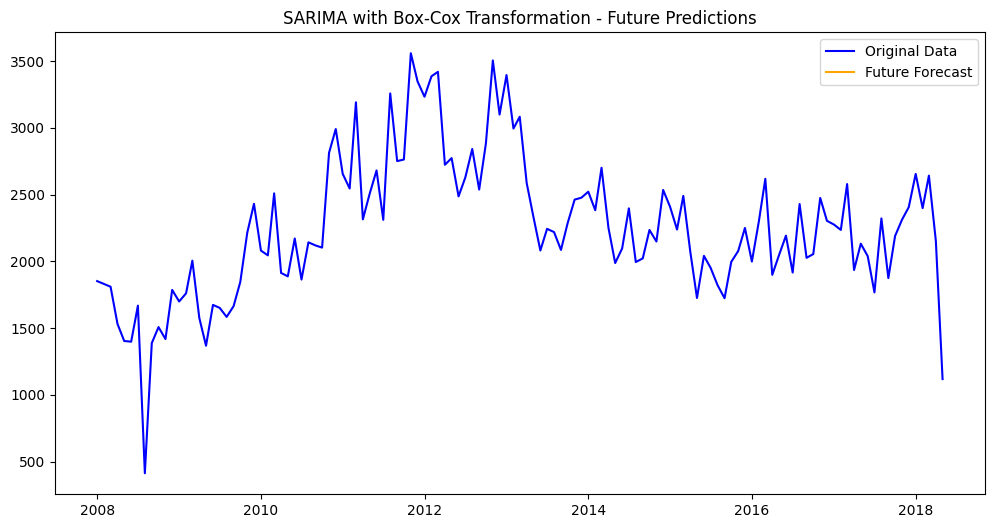

In [50]:
sarima_model = SARIMAX(gold_data_month_wise_df['transformed'], order=(0,3,1), seasonal_order=(2,3,0,12))
sarima_fit = sarima_model.fit(disp=False)

# Predict future values (e.g., next 12 months)
future_steps = 24
future_forecast = sarima_fit.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
last_date = gold_data_month_wise_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Future Predictions")
plt.legend()
plt.show()

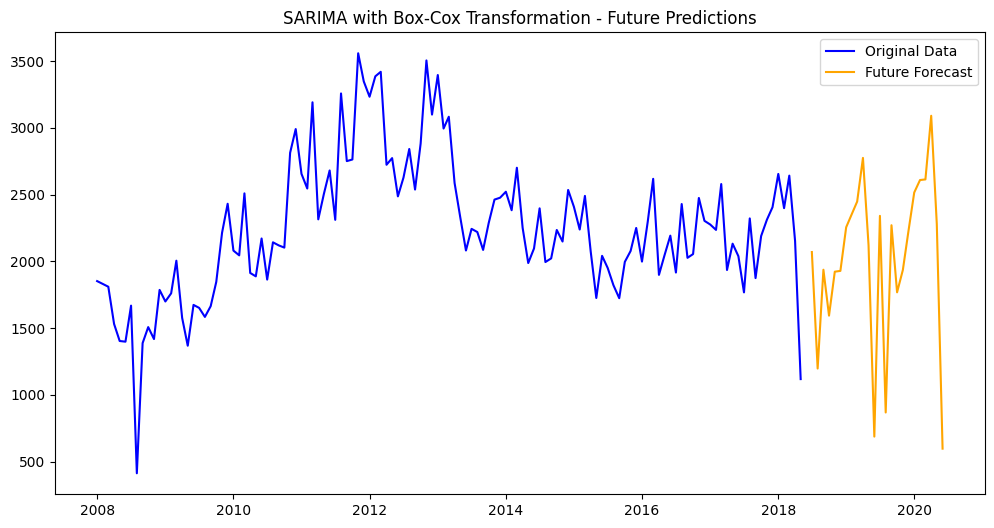

In [51]:
sarima_model = SARIMAX(gold_data_month_wise_df['transformed'], order=(2,1,0), seasonal_order=(0, 3, 1,12))
sarima_fit = sarima_model.fit(disp=False)

# Predict future values (e.g., next 12 months)
future_steps = 24
future_forecast = sarima_fit.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
last_date = gold_data_month_wise_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(gold_data_month_wise_df.index, values, label="Original Data", color="blue")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Future Predictions")
plt.legend()
plt.show()

# Save future predictions to a CSV file
future_df.to_csv("future_predictions.csv")

In [52]:
gold_data_month_wise_df

,GLD,transformed
Date,,
2008-01-01,1851.439997,1579.438341
2008-02-01,1829.749991,1561.370283
2008-03-01,1809.239996,1544.280402
2008-04-01,1530.189989,1311.270280
2008-05-01,1402.769989,1204.539173
...,...,...
2018-01-01,2654.420014,2245.141648
2018-02-01,2398.030006,2033.200403
2018-03-01,2641.560005,2234.523368
